In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# defining model path
model_path = "/content/drive/MyDrive/Leukemia/CAM/lk_final_v2_20k_hsv_vgg19.pt"

In [ ]:
# sample images
# ALL images
all_1_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1425_1.png"
all_2_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1700_0.png"
all_3_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1484_2.png"
all_4_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1527_3.png"
all_5_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1635_0.png"
all_6_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1436_3.png"
all_7_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1448_1.png"
all_8_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1464_2.png"
all_9_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1485_3.png"
all_10_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1507_0.png"

# HEM images
hem_1_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1004_0.png"
hem_2_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1006_3.png"
hem_3_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1014_1.png"
hem_4_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-100_3.png"
hem_5_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1018_3.png"
hem_6_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1171_3.png"
hem_7_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1021_0.png"
hem_7_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-102_0.png"
hem_8_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1036_0.png"
hem_9_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1045_1.png"
hem_10_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1070_0.png"
hem_11_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1040_1.png"
hem_12_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1053_2.png"
hem_13_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1072_3.png"
hem_14_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1072_0.png"
hem_15_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1084_2.png"
hem_16_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1119_0.png"
hem_17_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1131_2.png"
hem_18_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1141_0.png"
hem_19_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1146_2.png"
hem_20_path = "/content/drive/MyDrive/Leukemia/hsv_aug_s/HEM/HEM-1166_1.png"

In [ ]:
# defining transformation
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

data_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
                        ])

In [ ]:
# function to visualize transformed image
%matplotlib inline

# helper function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

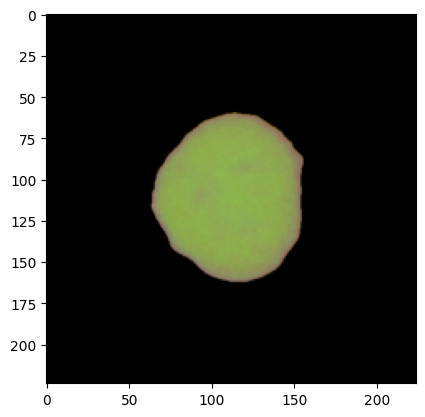

In [ ]:
# load an input image
from PIL import Image
all_d = Image.open(all_1_path)
all_img_1 = data_transforms(all_d )
imshow(all_img_1)

In [ ]:
# function to transform images into tensor and plot
def plot_image(image_path):
  pil_img = Image.open(image_path)
  transformed_img = data_transforms(pil_img)
  imshow(transformed_img)

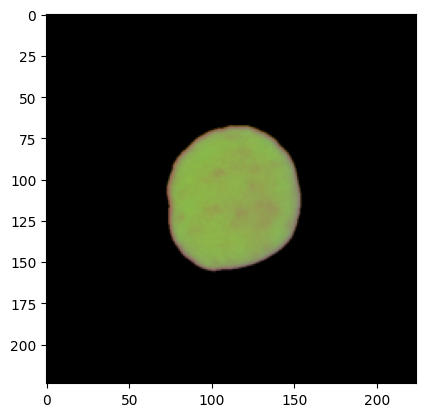

In [ ]:
plot_image(hem_1_path)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models

In [ ]:
# Taking vgg19 model
from torchvision import models
vgg19 = models.vgg19(weights='IMAGENET1K_V1')  #pretrained=True

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 64.0MB/s]


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# change the number of classes
vgg19.classifier[2] = nn.Dropout(p= 0.5, inplace= False)
vgg19.classifier[3] = nn.Linear(4096, 1024)
vgg19.classifier[5] = nn.Dropout(p= 0.25, inplace= False)
vgg19.classifier[6] = nn.Linear(1024, 2)

# # freeze convolution weights
# for param in vgg19.features.parameters():
#     param.requires_grad = False

In [ ]:
# loading pre-trained weights
vgg19.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
# defining custom model

class VGG_19_Extractor(nn.Module):
    def __init__(self):
        super(VGG_19_Extractor, self).__init__()

        # get the pretrained VGG-19 network
        self.vgg = vgg19

        # disect the network to access its last convolutional layer
        self.features_conv = self.vgg.features[:36]

        # get the max pool of the features stem
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

        # add the average global pool
        # self.global_avg_pool = nn.AvgPool2d(kernel_size=7, stride=1)

        # get the classifier of the model
        self.classifier = self.vgg.classifier

        # placeholder for the gradients
        self.gradients = None


    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad

    def forward(self, x):
        x = self.features_conv(x)

        # register the hook
        # if self.train and x.requires_grad:
        #   h = x.register_hook(self.activations_hook)
        #   print(h.shape)
        h = x.register_hook(self.activations_hook)

        # apply the remaining pooling
        x = self.max_pool(x)
        x = x.view((1, -1))
        x = self.classifier(x)
        return x

    def get_activations_gradient(self):
        return self.gradients

    def get_activations(self, x):
        return self.features_conv(x)

In [ ]:
# define hook
# hook is use to get features from expected layer
features = {}

def get_features(name):
  def hook(model, input, output):
    if torch.cuda.is_available():
      features[name] = output.cpu().detach().numpy()
    else:
      features[name] = output.detach().numpy()
  return hook

In [ ]:
# initialize the Custom model
custom_model = VGG_19_Extractor()

In [ ]:
# register hooks
# we will register hooks for that layer from which we want to extract features
# and this layer information we wil get from the model's summary
custom_model.classifier[4].register_forward_hook(get_features('classifier[3]'))

In [ ]:
# function to convert image into tensor
def img_to_tensor(image_path):
  pil_img = Image.open(image_path)
  transformed_img = data_transforms(pil_img)
  transformed_img = transformed_img.reshape(1, 3, 224, 224)
  return transformed_img

In [ ]:
all_demo_1 = img_to_tensor(all_1_path)

In [ ]:
# defining model as evaluation model
custom_model.eval()

VGG_19_Extractor(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
     

In [ ]:
# getting prediction
all_1_pred = custom_model(all_demo_1)
all_1_feat = features['classifier[3]']

In [ ]:
# getting shape of extracted features
print(f"Shpae of extracted features: {all_1_feat.shape}")

Shpae of extracted features: (1, 1024)


In [ ]:
# getting predicted index
index = all_1_pred.argmax(dim=1)
print(f"Predicted index: {index}")

Predicted index: tensor([0])


In [ ]:
classes = ['ALL', 'HEM']
print(f"predicted class by CNN: {classes[int(index)]}")

predicted class by CNN: ALL


In [ ]:
# getting index value as an item
ind_val = index.item()
print(ind_val)

0


In [ ]:
# perform backpropagation
all_1_pred[:,ind_val].backward()

In [ ]:
# pull the gradients out of the model
gradients = custom_model.get_activations_gradient()
print(gradients)

tensor([[[[-3.4614e-03,  0.0000e+00, -1.2804e-03,  ...,  0.0000e+00,
           -3.7947e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 1.5654e-04,  0.0000e+00,  5.3188e-03,  ...,  0.0000e+00,
           -2.0567e-04,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [-2.9987e-03,  0.0000e+00, -2.0018e-04,  ...,  0.0000e+00,
           -4.1569e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],

         [[-1.1089e-03,  0.0000e+00, -1.3418e-03,  ...,  0.0000e+00,
           -4.8856e-04,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [-5.2498e-03,  0.0000e+00, -7.7623e-03,  ...,  0.0000e+00,
           -3.7320e-03,  0.0000e+00],
          ...,
     

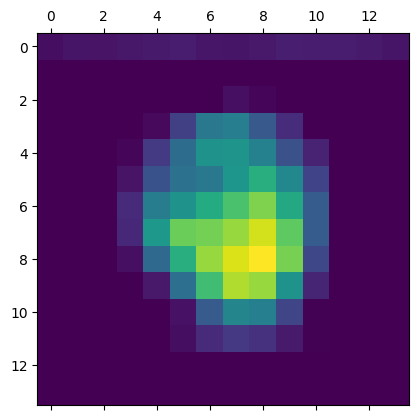

In [ ]:
# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

# get the activations of the last convolutional layer
activations = custom_model.get_activations(all_demo_1).detach()

# weight the channels by corresponding gradients
for i in range(512):
    activations[:, i, :, :] *= pooled_gradients[i]

# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
heatmap = np.maximum(heatmap, 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)

# draw the heatmap
plt.matshow(heatmap.squeeze())
plt.show()

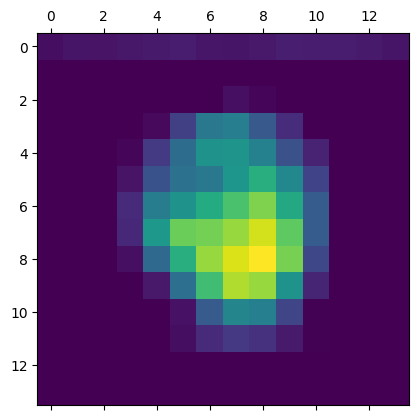

In [ ]:
# getting altogether

all_1_pred = custom_model(all_demo_1)
all_1_pred[:,ind_val].backward()

# pull the gradients out of the model
gradients = custom_model.get_activations_gradient()
# print(gradients)

# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

# get the activations of the last convolutional layer
activations = custom_model.get_activations(all_demo_1).detach()

# weight the channels by corresponding gradients
for i in range(512):
    activations[:, i, :, :] *= pooled_gradients[i]

# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
heatmap = np.maximum(heatmap, 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)

# draw the heatmap
plt.matshow(heatmap.squeeze())
plt.show()

In [ ]:
heatmap.squeeze().shape

torch.Size([14, 14])

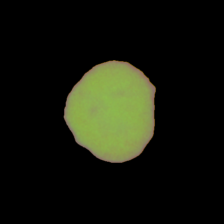

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(all_1_path)
cv2_imshow(img)

<class 'numpy.ndarray'>
(224, 224, 3)
torch.Size([14, 14])


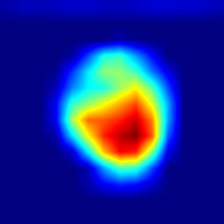

In [ ]:
print(type(img))
print(img.shape)
print(heatmap.shape)
heatmap = heatmap.numpy()
heatmap = cv2.resize(heatmap, (img.shape[0], img.shape[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
cv2_imshow(heatmap)

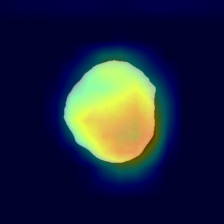

In [ ]:
superimposed_img = heatmap * 0.35 + img
cv2_imshow(superimposed_img)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# function to get grad cam image

def get_gradcam(input_img, fe_model):
  img = img_to_tensor(input_img)   # take image path as input
  print('plotting input image: \n')
  plot_image(input_img)
  plt.show()

  pred_img = fe_model(img)
  index = pred_img.argmax(dim=1)
  ind_val = index.item()
  pred_img[:,ind_val].backward()

  # pull the gradients out of the model
  gradients = fe_model.get_activations_gradient()

  # pool the gradients across the channels
  pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

  # get the activations of the last convolutional layer
  activations = fe_model.get_activations(img).detach()

  # weight the channels by corresponding gradients
  for i in range(512):
      activations[:, i, :, :] *= pooled_gradients[i]

  # average the channels of the activations
  heatmap = torch.mean(activations, dim=1).squeeze()

  # relu on top of the heatmap
  heatmap = np.maximum(heatmap, 0)

  # normalize the heatmap
  heatmap /= torch.max(heatmap)
  img_2 = cv2.imread(input_img)
  print('plotting raw heatmap: \n')
  plt.matshow(heatmap.squeeze())
  plt.show()


  heatmap = heatmap.numpy()
  heatmap = cv2.resize(heatmap, (img_2.shape[1], img_2.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print('plotting converted heatmap: \n')
  # plt.imshow(heatmap)
  cv2_imshow(heatmap)
  plt.show()

  superimposed_img = heatmap * 0.35 + img_2
  print('plotting Grad-CAM image: \n')
  cv2_imshow(superimposed_img)
  plt.show()

  return img_2, superimposed_img


plotting input image: 



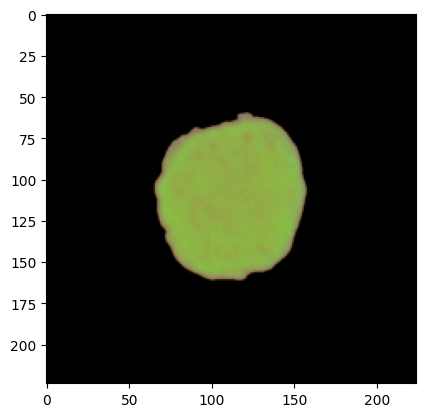

plotting raw heatmap: 



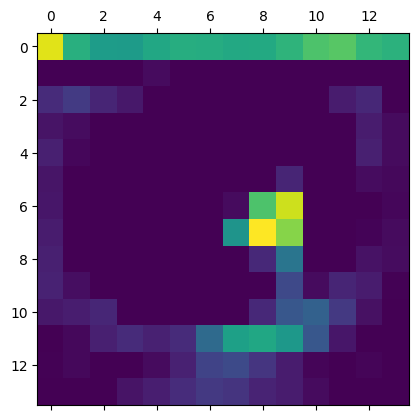

plotting converted heatmap: 



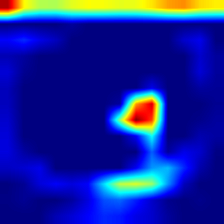

plotting Grad-CAM image: 



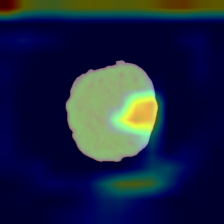

In [ ]:
# now we will test with images
org_img, cam_img = get_gradcam(all_2_path, custom_model)

In [ ]:
# write an image
base_path = "/content/drive/MyDrive/Leukemia/CAM/"

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# function to get grad cam image

def get_gradcam(input_img, fe_model):
  img = img_to_tensor(input_img)   # take image path as input

  pred_img = fe_model(img)
  index = pred_img.argmax(dim=1)
  ind_val = index.item()
  pred_img[:,ind_val].backward()

  # pull the gradients out of the model
  gradients = fe_model.get_activations_gradient()

  # pool the gradients across the channels
  pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

  # get the activations of the last convolutional layer
  activations = fe_model.get_activations(img).detach()

  # weight the channels by corresponding gradients
  for i in range(512):
      activations[:, i, :, :] *= pooled_gradients[i]

  # average the channels of the activations
  heatmap = torch.mean(activations, dim=1).squeeze()

  # relu on top of the heatmap
  heatmap = np.maximum(heatmap, 0)

  # normalize the heatmap
  heatmap /= torch.max(heatmap)
  img_2 = cv2.imread(input_img)

  heatmap = heatmap.numpy()
  heatmap = cv2.resize(heatmap, (img_2.shape[1], img_2.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.35 + img_2

  return img_2, superimposed_img


In [ ]:
all_images = []

# APPENDING TO ALL IMAGE LIST
all_images.append(all_1_path)
all_images.append(all_2_path)
all_images.append(all_3_path)
all_images.append(all_4_path)
all_images.append(all_5_path)
all_images.append(all_6_path)
all_images.append(all_7_path)
all_images.append(all_8_path)
all_images.append(all_9_path)
all_images.append(all_10_path)


In [ ]:
hem_images = []
# APPENDING TO HEM IMAGES
hem_images.append(hem_1_path)
hem_images.append(hem_2_path)
hem_images.append(hem_3_path)
hem_images.append(hem_4_path)
hem_images.append(hem_5_path)
hem_images.append(hem_6_path)
hem_images.append(hem_7_path)
hem_images.append(hem_8_path)
hem_images.append(hem_9_path)
hem_images.append(hem_10_path)
hem_images.append(hem_11_path)
hem_images.append(hem_12_path)
hem_images.append(hem_13_path)
hem_images.append(hem_14_path)
hem_images.append(hem_15_path)
hem_images.append(hem_16_path)
hem_images.append(hem_17_path)
hem_images.append(hem_18_path)
hem_images.append(hem_19_path)
hem_images.append(hem_20_path)

In [ ]:
all_images[0]

'/content/drive/MyDrive/Leukemia/hsv_aug_s/ALL/ALL-1425_1.png'

In [ ]:
# function to save images
def save_images(base_path, org_img, gcam_img, name, num):
  cv2.imwrite(base_path+ name+ '_'+ str(num)+ '_org.png', org_img)
  cv2.imwrite(base_path+ name+ '_'+ str(num)+ '_gcam.png', gcam_img)
  print("Done!")

In [ ]:
# for all images
for i in range(len(all_images)):
  org_img_path = all_images[i]
  org_img, cam_img = get_gradcam(org_img_path, custom_model)
  save_images(base_path, org_img, cam_img, 'ALL', i)
print("Completed....!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Completed....!


In [ ]:
# for HEM images
for i in range(len(hem_images)):
  org_img_path = hem_images[i]
  org_img, cam_img = get_gradcam(org_img_path, custom_model)
  save_images(base_path, org_img, cam_img, 'HEM', i)
print("Completed....!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Completed....!
